***

<div align="center">

## Assignment 6 Knock airport Weather

</div>

***

Import nessesary packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

Load a file, skip extra rows, and also use skipinitialspace=True, which removes spaces after commas, to ensure that values in the dataset are read correctly.

In [2]:

dfKnock = pd.read_csv("hly4935.csv", skiprows=23, skipinitialspace=True)

dfKnock.head(5)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


In [3]:
# Understanding the structure and completeness of the data. 
dfKnock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246930 non-null  object 
 1   ind     246930 non-null  int64  
 2   rain    246881 non-null  float64
 3   ind.1   246930 non-null  int64  
 4   temp    246930 non-null  float64
 5   ind.2   246930 non-null  int64  
 6   wetb    246930 non-null  float64
 7   dewpt   246930 non-null  float64
 8   vappr   246930 non-null  float64
 9   rhum    246930 non-null  int64  
 10  msl     246912 non-null  float64
 11  ind.3   246930 non-null  int64  
 12  wdsp    246880 non-null  float64
 13  ind.4   246930 non-null  int64  
 14  wddir   246878 non-null  float64
 15  ww      192218 non-null  float64
 16  w       192217 non-null  float64
 17  sun     246930 non-null  float64
 18  vis     185123 non-null  float64
 19  clht    246912 non-null  float64
 20  clamt   246912 non-null  float64
dtypes: float64

In [4]:
# Identifying columns with missing data.
dfKnock.isna().sum()

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       54712
w        54713
sun          0
vis      61807
clht        18
clamt       18
dtype: int64

In [9]:
# Convert the Date column to datetime format. 
# The errors='coerce' argument tells pandas to handle invalid date formats by converting those entries 
# to NaT (Not a Time) instead of raising an error.

dfKnock['date'] = pd.to_datetime(dfKnock['date'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')

dfKnock['date'].head(10)

0   1996-04-10 14:00:00
1   1996-07-31 08:00:00
2   1996-07-31 09:00:00
3   1996-07-31 10:00:00
4   1996-07-31 11:00:00
5   1996-07-31 12:00:00
6   1996-07-31 13:00:00
7   1996-07-31 14:00:00
8   1996-07-31 15:00:00
9   1996-07-31 16:00:00
Name: date, dtype: datetime64[ns]

In [10]:
dfKnock.head(5)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


In [11]:
# Choose the style.
plt.style.use("grayscale")

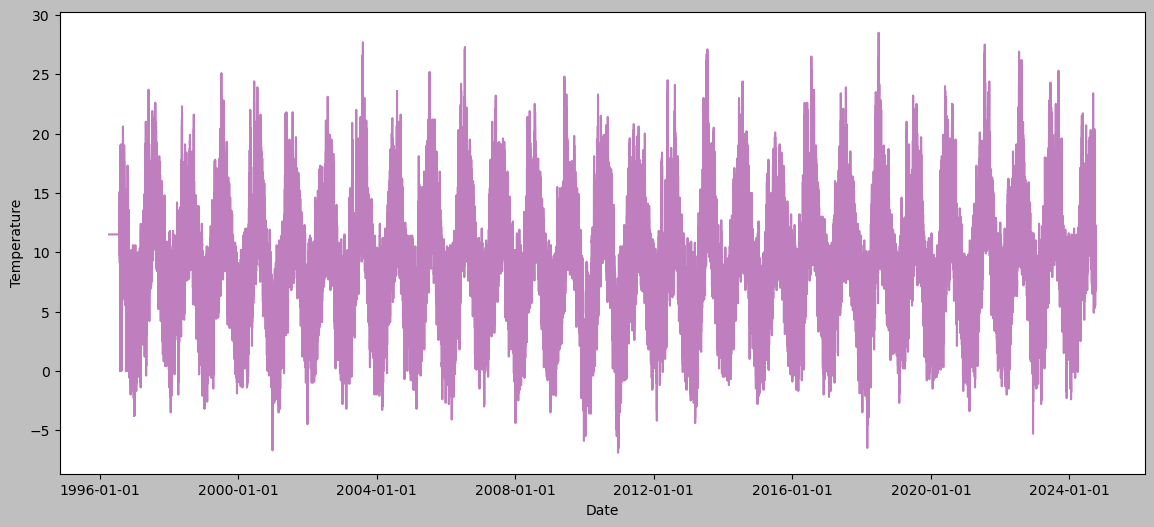

In [12]:
# Create a plot of temperature over time, displaying only the date (without time) on the x-axis.
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(dfKnock['date'], dfKnock['temp'], color='purple', alpha=0.5)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Temperature');

In [13]:
# This line sets the 'date' column as the index for dfKnock, modifying the DataFrame in place.
dfKnock.set_index('date', inplace=True)

In [14]:
# Calculate the mean temperature for each day.
meantemp_daily = dfKnock['temp'].resample('D').mean()

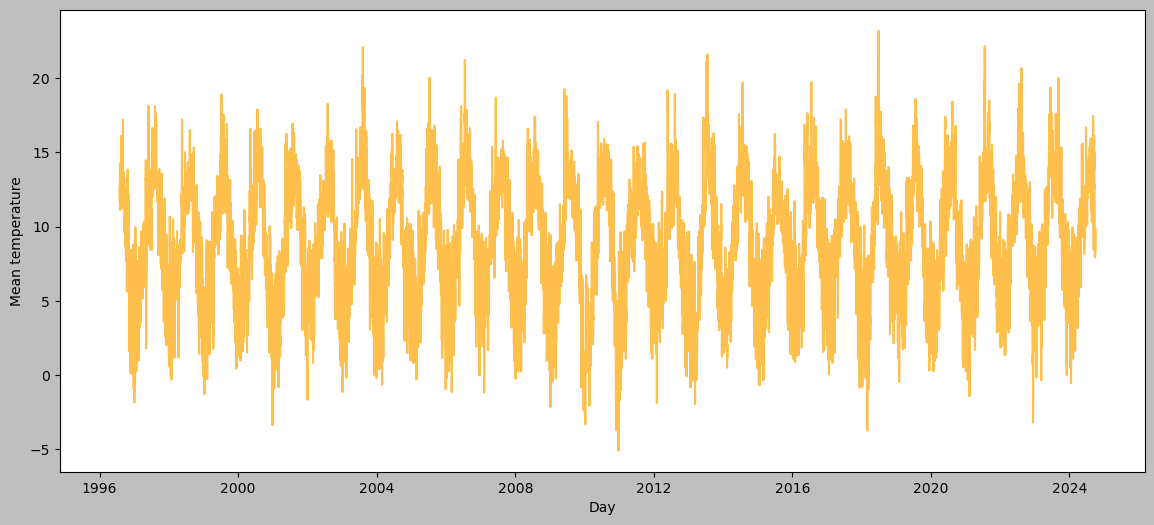

In [15]:
# Create a plot showing the mean temperature for each day, with dates on the x-axis and mean temperature values on the y-axis.
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(meantemp_daily.index, meantemp_daily.values, color='orange', alpha=0.7)
ax.set_xlabel('Day')
ax.set_ylabel('Mean temperature');

In [16]:
# Calculate the monthly mean temperature.
meantemp_mounthly = dfKnock['temp'].resample('M').mean()

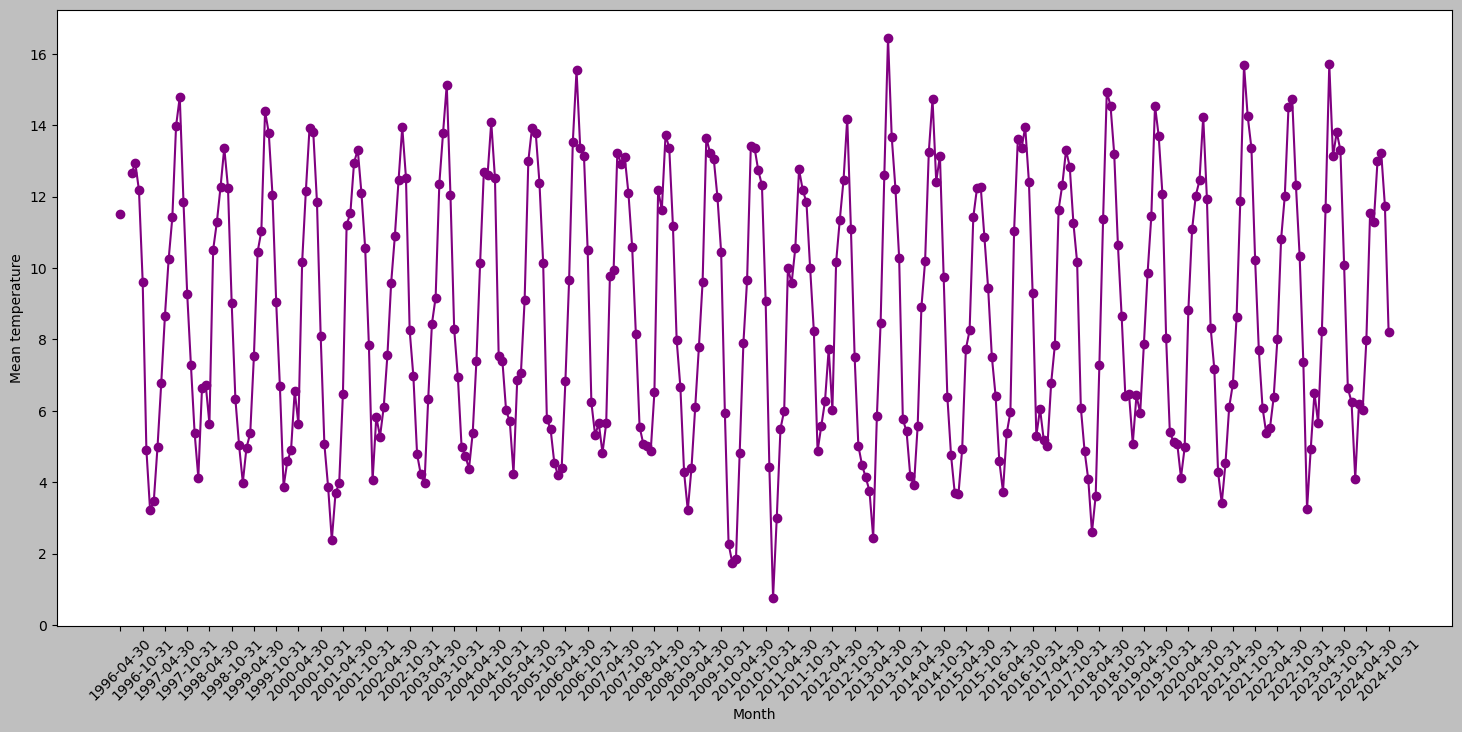

In [17]:
# Create a plot of the monthly mean temperature with months on the x-axis (displayed every six months).
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(meantemp_mounthly.index.astype(str), meantemp_mounthly.values, color='purple', marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Mean temperature')
ax.set_xticks(ax.get_xticks()[::6])
plt.xticks(rotation=45);

In [18]:
# Fill missing values in the "wdsp" column of dfKnock with the median of that column.
dfKnock['wdsp'].fillna(dfKnock['wdsp'].median(), inplace=True)

In [19]:
# verify that all missing values were successfully filled.
dfKnock['wdsp'].isna().sum()

0

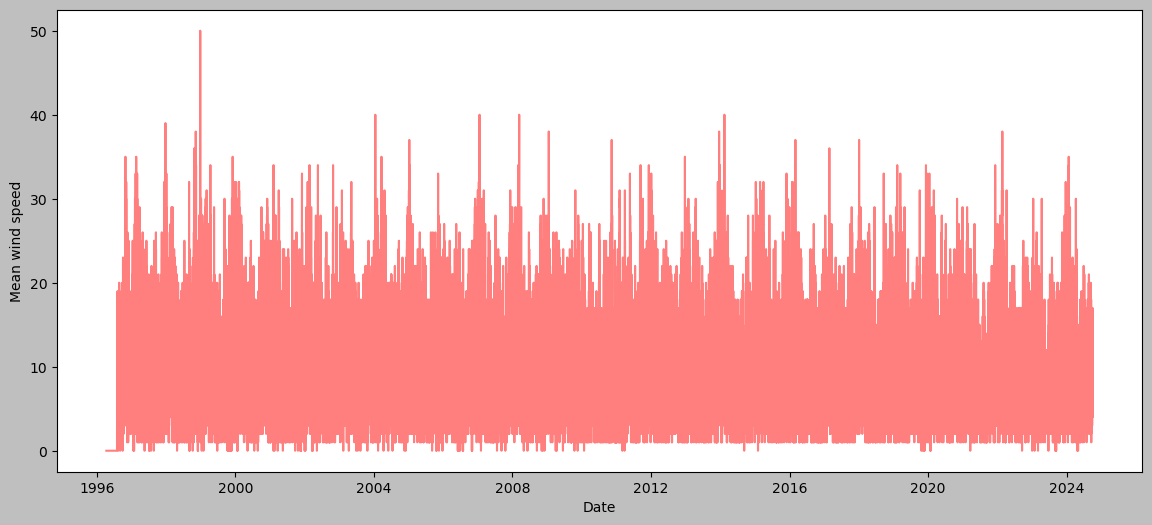

In [20]:
# Create a plot of the mean wind speed over time, with dates on the x-axis and wind speed values on the y-axis
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(dfKnock.index, dfKnock['wdsp'], color='red', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Mean wind speed');

In [21]:
# Calculate the 24-hour rolling average of wind speed (wdsp) and store the result in a new column called 'rollingwdsp_24h'.
dfKnock['rollingwdsp_24h'] = dfKnock['wdsp'].rolling(window=24).mean()

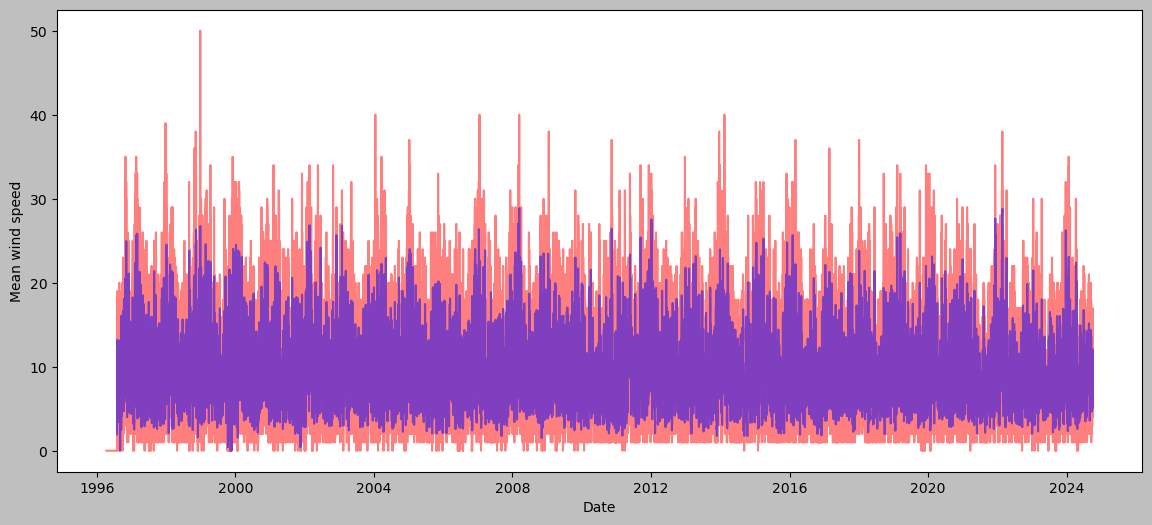

In [22]:
# Create a plot showing the mean wind speed (wdsp) over time in red and the 24-hour rolling average wind speed (rollingwdsp_24h) in blue.
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(dfKnock.index, dfKnock['wdsp'], color='red', alpha=0.5)
ax.plot(dfKnock.index, dfKnock['rollingwdsp_24h'], color='blue', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Mean wind speed');


In [23]:
# Calculate the daily maximum wind speed.
maxwdsp_daily = dfKnock['wdsp'].resample('D').max()

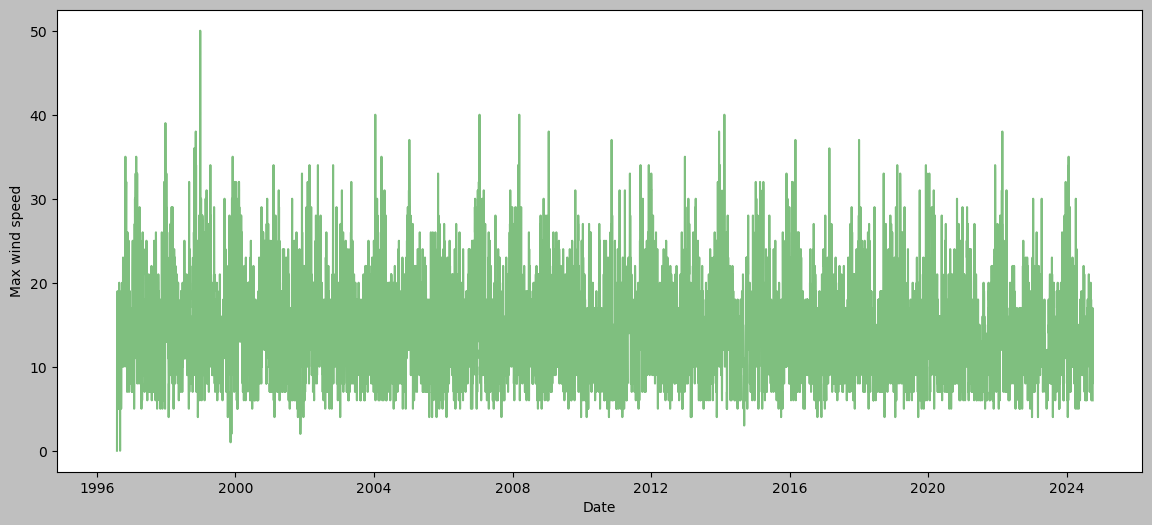

In [24]:
# Create a plot of the daily maximum wind speed, with dates on the x-axis and maximum wind speed values on the y-axis.
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(maxwdsp_daily.index, maxwdsp_daily.values, color='green', alpha = 0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Max wind speed');

In [25]:
# Calculate the monthly mean of daily maximum wind speeds.
monthlymean_of_dailymax = maxwdsp_daily.resample('M').mean()

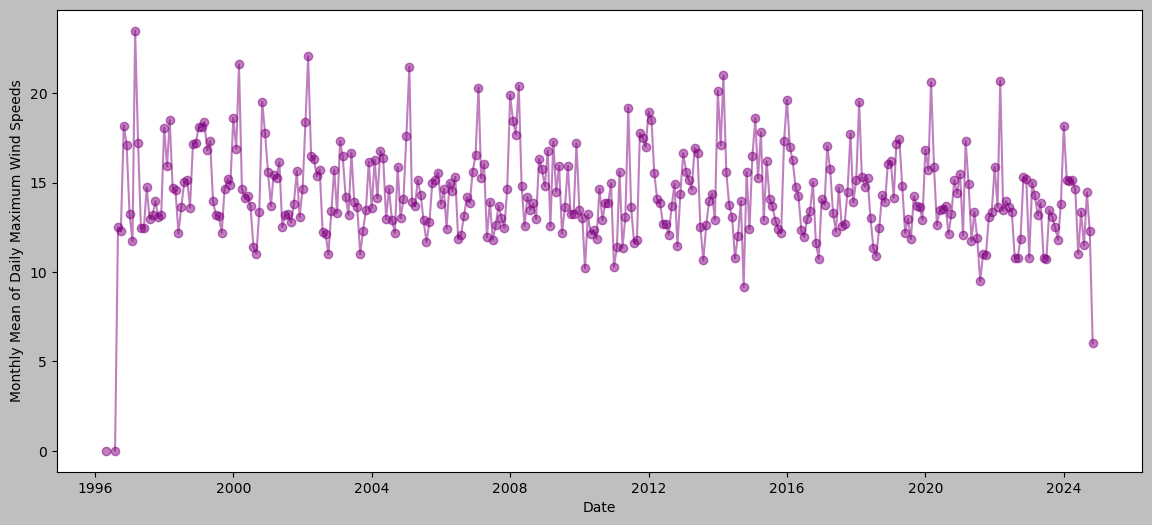

In [26]:
# Create a plot of the monthly mean of daily maximum wind speeds, with dates on the x-axis and the mean values on the y-axis.
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthlymean_of_dailymax.index, monthlymean_of_dailymax.values, color='purple', marker='o', alpha = 0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Mean of Daily Maximum Wind Speeds');

***

#### END

***